### Questions

A.) Analyze CustomerDemographics

B.) Customer Account Information

C.) look at the distribution of various services used by customers

D.) Look at the relation between monthly and total charge

E.) Create a Correlation plot

F.) Finally, let's take a look at our predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

G.) Create a predictive model capable of predicting churn based on the identified predictor variables

#### Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
#sns.set_theme(style="whitegrid")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  #use to split my dataset.
from sklearn.feature_selection import RFE  #used to select the column i will usee for Multivariate Logistic Regression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# display all values
# pd.set_option('display.max_rows', None)

#### Load Datasets and Verify

In [2]:
#Load dataset
telco = pd.read_csv("/Users/harry/Desktop/dataAnalysis_Projects/Telco-Customer-Churn.csv")

In [3]:
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# Check the column names on the covid_deaths dataset
telco.columns.values.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
# Check for nan values

for col in telco.columns:
    per_null = np.mean(telco[col].isnull())
    print('{} - {}%'.format(col, round(per_null*100)))
    
    

customerID - 0%
gender - 0%
SeniorCitizen - 0%
Partner - 0%
Dependents - 0%
tenure - 0%
PhoneService - 0%
MultipleLines - 0%
InternetService - 0%
OnlineSecurity - 0%
OnlineBackup - 0%
DeviceProtection - 0%
TechSupport - 0%
StreamingTV - 0%
StreamingMovies - 0%
Contract - 0%
PaperlessBilling - 0%
PaymentMethod - 0%
MonthlyCharges - 0%
TotalCharges - 0%
Churn - 0%


In [6]:
telco.isnull().values.any()

False

In [7]:
#Check for duplicated values
telco.duplicated().sum()

0

In [8]:
telco.shape

(7043, 21)

In [9]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#Check data types
data_type = pd.DataFrame(telco.dtypes).T.rename({0:'python data types'})
data_type

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,object,object,int64,object,object,int64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object


In [11]:
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Data Cleaning

##### change the TotalCharges data type to float

In [12]:
telco['TotalCharges'].dtypes

dtype('O')

In [13]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'].str.replace(",", ""), errors='coerce')

In [14]:
telco['TotalCharges'].isnull().values.any()

True

In [15]:
telco['TotalCharges'].isnull().sum()

11

In [16]:
telco = telco.dropna()

In [17]:
# telco['TotalCharges'] = telco['TotalCharges'].fillna(0)

In [18]:
telco['TotalCharges'].isnull().values.any()

False

In [19]:
telco['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [20]:
telco['TotalCharges'].dtypes

dtype('float64')

In [21]:
# drop the customerID column from the dataset
telco.drop(columns='customerID', inplace=True)

In [22]:
# gen_num = {'Male': 1, 'Female': 0}
# telco.gender.replace(gen_num, inplace=True)

In [23]:
telco['Churn'] = np.where(telco['Churn'] == "No", 0, 1)

### Exploratory Analysis


#### Univariate Analysis

#### Question 1:

##### Analyze CustomerDemographics

##### Task 1: Get gender

In [24]:
gen = telco['gender'].value_counts()
gen

Male      3549
Female    3483
Name: gender, dtype: int64

In [25]:
# plt.pie(gen, labels = gen, autopct='%1.1f%%', shadow = True )
# plt.title('Gender')
# plt.axis('equal')
# plt.legend(labels=gen.index)
# plt.show()

In [26]:
#Check which gender churn more.
# gen_chu = telco[['gender','Churn']].groupby(['gender']).mean().plot.pie(subplots=True, normalize=True, autopct='%1.1f%%')
# gen_chu;

In [27]:
#Check which gender churn more.
gen_chu = telco[['gender','Churn']].groupby(['gender']).mean()
gen_chu

,Churn
gender,
Female,0.269595
Male,0.262046


In [28]:
#change 2D array to 1D array
gen_flat = np.ravel(gen_chu)

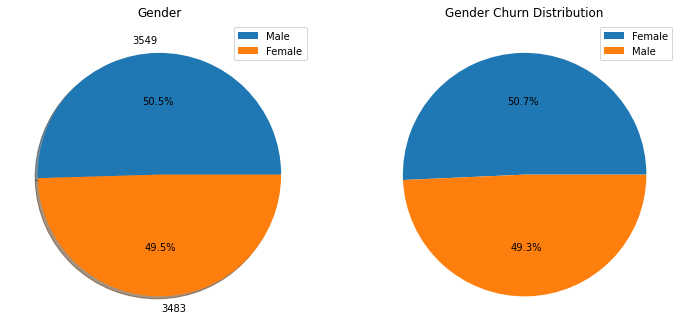

In [29]:
# Gender Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 7), sharey=True)

ax1.pie(gen, labels = gen, autopct='%1.1f%%', shadow = True)
ax2.pie(gen_flat,  autopct='%1.1f%%', normalize=True)

ax1.set_title("Gender")
ax1.legend(labels=gen.index)


ax2.set_title("Gender Churn Distribution")
ax2.legend(labels=gen_chu.index);

Interpretation:
- We have more male customer than female (%50.5 vs 49.5%).
- More female Churn than male.

##### Task 2: Get Senior Citizen

In [30]:
snr = telco['SeniorCitizen'].value_counts()
snr

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [31]:
# plt.pie(snr, labels = snr, autopct='%1.1f%%', shadow = True )
# plt.title('Seniors')
# plt.axis('equal')
# plt.legend(labels=snr.index)
# plt.show()

In [32]:
#check the distribute of churn among gender column
# telco[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean().plot.pie(subplots=True, normalize=True, autopct='%1.1f%%');

In [33]:
#check the distribute of churn among SeniorCititzen column
snrCit = telco[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()
snrCit

,Churn
SeniorCitizen,
0,0.236503
1,0.416813


In [34]:
#change 2D array to 1D array
snr_cit = np.ravel(snrCit)

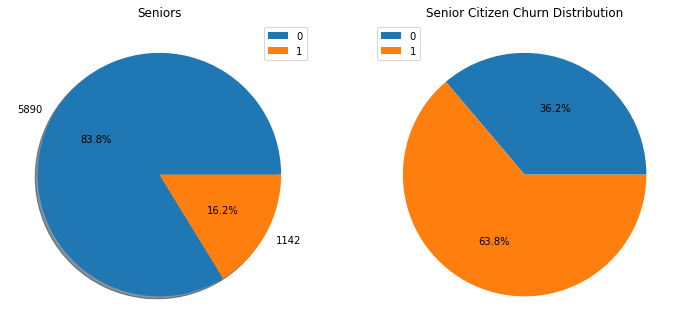

In [35]:
# Seniors Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 7))

ax1.pie(snr, labels = snr, autopct='%1.1f%%', shadow = True)
ax2.pie(snr_cit,  autopct='%1.1f%%', normalize=True)

ax1.set_title("Seniors")
ax1.legend(labels=snr.index)


ax2.set_title("Senior Citizen Churn Distribution")
ax2.legend(labels=snrCit.index);

Interpretation:
- We have more customer who are not seniors than seniors (%83.8 vs 16.2%).
- More Seniors Churn than nor Seniors.

##### Task 3: Get Partner

In [36]:
pat = telco['Partner'].value_counts()
pat

No     3639
Yes    3393
Name: Partner, dtype: int64

In [37]:
# plt.pie(pat, labels = pat, autopct='%1.1f%%', shadow = True )
# plt.title('Partners')
# plt.axis('equal')
# plt.legend(labels=pat.index)
# plt.show()

In [38]:
#check the distribute of churn among partner column
# telco[['Partner','Churn']].groupby(['Partner']).mean().plot.pie(subplots=True, normalize=True, autopct='%1.1f%%');

In [39]:
#check the distribute of churn among partner column
par = telco[['Partner','Churn']].groupby(['Partner']).mean()
par

,Churn
Partner,
No,0.329761
Yes,0.197171


In [40]:
#change 2D array to 1D array
pat_flat = np.ravel(par)

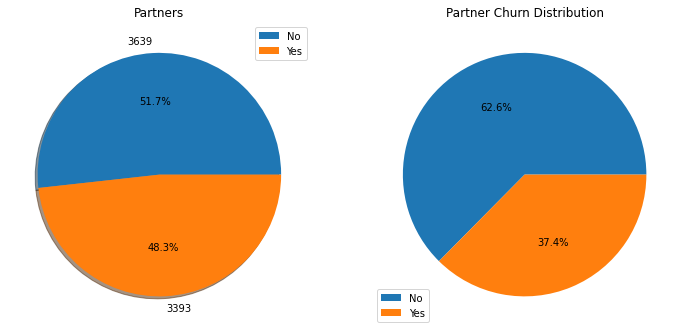

In [41]:
# Parner Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 7))

ax1.pie(pat, labels = pat, autopct='%1.1f%%', shadow = True)
ax2.pie(pat_flat,  autopct='%1.1f%%', normalize=True)

ax1.set_title("Partners")
ax1.legend(labels=pat.index)


ax2.set_title("Partner Churn Distribution")
ax2.legend(labels=par.index);

Interpretation:
- We have more customer who have no partner than have partner (%51.7 vs 48.3%).
- More single customer are likely to Churn than partnered customer.

##### Task 4: Get Dependents

In [42]:
dep = telco['Dependents'].value_counts()
dep

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [43]:
# plt.pie(dep, labels = dep, autopct='%1.1f%%', shadow = True )
# plt.title('Dependents')
# plt.axis('equal')
# plt.legend(labels=dep.index)
# plt.show()

In [44]:
#check the distribute of churn among Dependents column
# telco[['Dependents','Churn']].groupby(['Dependents']).mean().plot.pie(subplots=True, normalize=True, autopct='%1.1f%%');

In [45]:
depe = telco[['Dependents','Churn']].groupby(['Dependents']).mean()
depe

,Churn
Dependents,
No,0.312791
Yes,0.155312


In [46]:
#change 2D array to 1D array
dep_flat = np.ravel(depe)

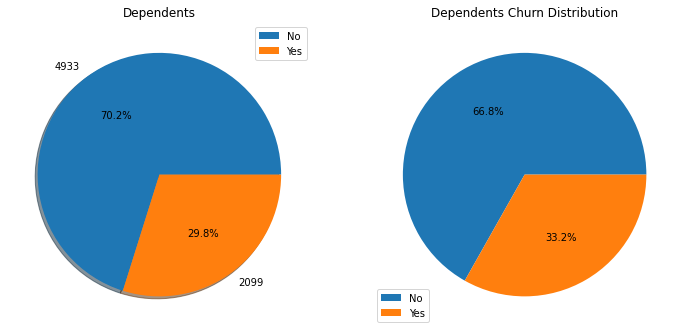

In [47]:
# Dependents Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 7))

ax1.pie(dep, labels = dep, autopct='%1.1f%%', shadow = True)
ax2.pie(dep_flat, autopct='%1.1f%%', normalize=True)

ax1.set_title("Dependents")
ax1.legend(labels=dep.index)


ax2.set_title("Dependents Churn Distribution")
ax2.legend(labels=depe.index);

Interpretation:
- We have less customer who have dependents than customer who have dependents (70.2% vs 29.8%).
- More customer who do not have dependent are likely to Churn than those who have a customer.

#### Question 2:

##### Customer Account Information

##### Task 1: Get Tenure

In [48]:
ten = telco['tenure'].value_counts()

In [49]:
ten.describe()

count     72.000000
mean      97.666667
std       77.237880
min       50.000000
25%       65.750000
50%       76.000000
75%       98.250000
max      613.000000
Name: tenure, dtype: float64

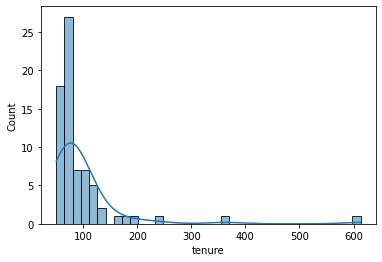

In [50]:
# sns.distplot(ten)
sns.histplot(data= ten, kde=True)
plt.show()

##### Task 2: Get Contract

In [51]:
con = telco['Contract'].value_counts()
con

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [52]:
# plt.pie(con, labels = con, autopct='%1.1f%%', shadow = True )
# plt.title('Contract')
# plt.axis('equal')
# plt.legend(labels= con.index)
# plt.show()

In [53]:
#check the distribute of churn among Contract column
# telco[['Contract','Churn']].groupby(['Contract']).mean().plot.pie(subplots=True, normalize=True, autopct='%1.1f%%');

In [54]:
cont = telco[['Contract','Churn']].groupby(['Contract']).mean()
cont

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [55]:
#change 2D array to 1D array
con_flat = np.ravel(cont)

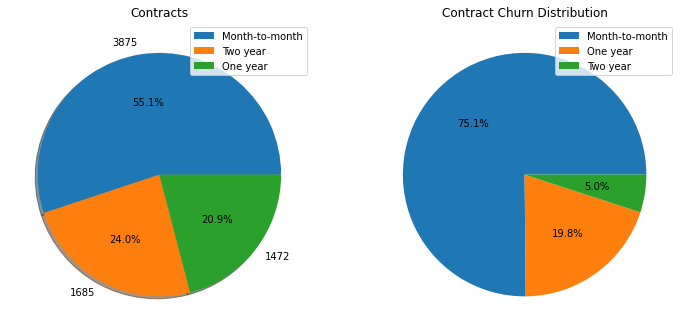

In [56]:
# Contract Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 7))

ax1.pie(con, labels = con, autopct='%1.1f%%', shadow = True)
ax2.pie(con_flat, autopct='%1.1f%%', normalize=True)

ax1.set_title("Contracts")
ax1.legend(labels=con.index)


ax2.set_title("Contract Churn Distribution")
ax2.legend(labels=cont.index);

Interpretation:
- We have more customer who has month-to-month contract than any form of contract (55.1% vs 20.9%, 24.0%).
- Customer who has month-to-month contract type are likely to Churn than type of contract.

##### Task 3: Get Monthly Charge

In [57]:
mon = telco['MonthlyCharges']

In [58]:
mon.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

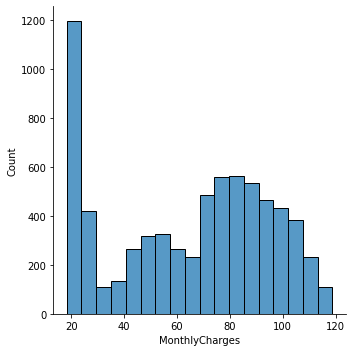

In [59]:
sns.displot(mon)
plt.show;

##### Task 4: Get Total Charge

In [60]:
tol = telco['TotalCharges']

In [61]:
tol.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

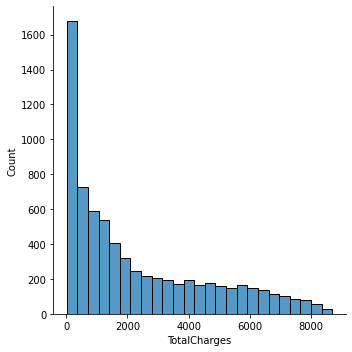

In [62]:
sns.displot(tol)
plt.show;

#### Question 3:

##### Customer Services Information

##### Task 1: Get Internet Service

In [63]:
internet = telco['InternetService'].value_counts()
internet

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [64]:
# plt.pie(internet, labels = internet, autopct='%1.1f%%', shadow = True )
# plt.title('Internet Services')
# plt.axis('equal')
# plt.legend(labels=internet.index)
# plt.show()

In [65]:
#check the distribute of churn among InternestService column
# telco[['InternetService','Churn']].groupby(['InternetService']).mean().plot.pie(subplots=True, normalize=True, autopct='%1.1f%%');

In [66]:
inte = telco[['InternetService','Churn']].groupby(['InternetService']).mean()
inte

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


In [67]:
#change 2D array to 1D array
int_flat = np.ravel(inte)

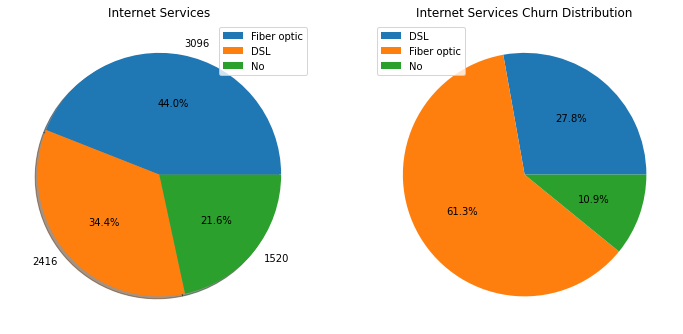

In [68]:
# Internet Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 7))

ax1.pie(internet, labels = internet, autopct='%1.1f%%', shadow = True)
ax2.pie(int_flat, autopct='%1.1f%%', normalize=True)

ax1.set_title("Internet Services")
ax1.legend(labels=internet.index)


ax2.set_title("Internet Services Churn Distribution")
ax2.legend(labels=inte.index);

Interpretation:
- We have more customer who has Fiber optic as a internetService than any form of InternetService (44.0% vs 34.4%, 21.6%).
- Customer who has Fiber optic internetServices type are likely to Churn than any type of internetService.

##### Task 2: Get Streaming TV

In [69]:
telco['StreamingTV'] = np.select((telco['StreamingTV']== 'No', telco['StreamingTV']== 'Yes', telco['StreamingTV']== 'No internet service'), (0,1,2))

In [70]:
tv = telco['StreamingTV'].value_counts()
tv

0    2809
1    2703
2    1520
Name: StreamingTV, dtype: int64

In [71]:
#check the distribute of churn among StreamingTV column
# telco[['StreamingTV','Churn']].groupby(['StreamingTV']).mean().plot.pie(subplots=True, normalize=True, autopct='%1.1f%%');

In [72]:
TV = telco[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()
TV

,Churn
StreamingTV,
0,0.335351
1,0.301147
2,0.074342


In [73]:
#change 2D array to 1D array
tv_flat = np.ravel(TV)

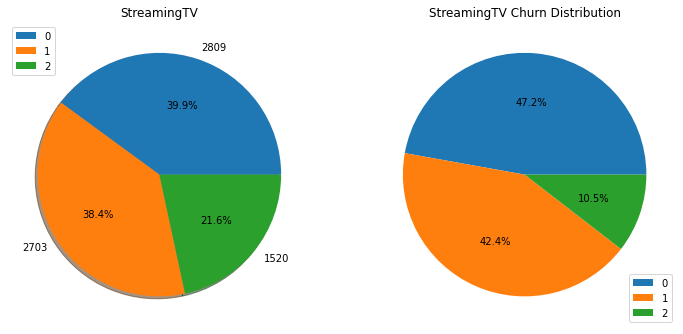

In [74]:
# StreamingTV Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 7))

ax1.pie(tv, labels = tv, autopct='%1.1f%%', shadow = True)
ax2.pie(tv_flat, autopct='%1.1f%%', normalize=True)

ax1.set_title("StreamingTV")
ax1.legend(labels=tv.index)


ax2.set_title("StreamingTV Churn Distribution")
ax2.legend(labels=TV.index);

Interpretation:
- We have more customer who don't StreamingTV (39.9% vs 38.4%, 21.6%).
- Customer who don't Stream Tv are likely to Churn than any type of StreamingTV.

##### Task 3: Get Streaming Movies

In [75]:
#Change data to numeric
telco['StreamingMovies'] = np.select((telco['StreamingMovies']== 'No', telco['StreamingMovies']== 'Yes', telco['StreamingMovies']== 'No internet service'), (0,1,2))

In [76]:
# telco['StreamingMovies'] = pd.to_numeric(telco['StreamingMovies'], errors='coerce')

In [77]:
movie = telco['StreamingMovies'].value_counts()
movie

0    2781
1    2731
2    1520
Name: StreamingMovies, dtype: int64

In [78]:
# movie.plot(kind="bar");

In [79]:
#check the distribute of churn among StreamingMovies column
# telco[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean().plot.pie(subplots=True, normalize=True, autopct='%1.1f%%');

In [80]:
mo = telco[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()
mo

,Churn
StreamingMovies,
0,0.337289
1,0.299524
2,0.074342


In [81]:
#change 2D array to 1D array
mov_flat = np.ravel(mo)

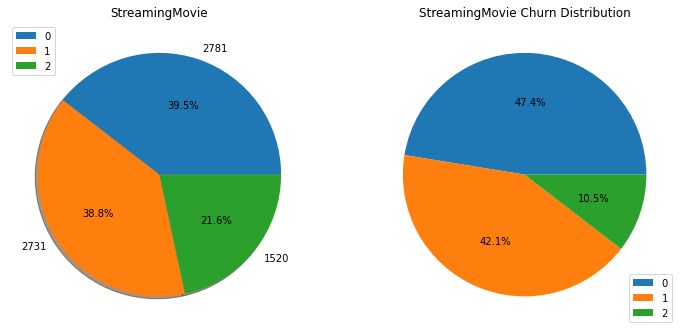

In [82]:
# StreamingMovies Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 7))

ax1.pie(movie, labels = movie, autopct='%1.1f%%', shadow = True)
ax2.pie(mov_flat, autopct='%1.1f%%', normalize=True)

ax1.set_title("StreamingMovie")
ax1.legend(labels=movie.index)


ax2.set_title("StreamingMovie Churn Distribution")
ax2.legend(labels=mo.index);

Interpretation:
- We have more customer who don't StreamingMovie (39.5% vs 38.8%, 21.6%).
- Customer who don't Stream Movie are likely to Churn than any type of StreamingTV.

In [83]:
all_Churn = pd.pivot_table(telco, values= 'Churn', index=['gender'], columns=['SeniorCitizen'], aggfunc=np.mean)
all_Churn*100

SeniorCitizen,0,1
gender,,
Female,23.979417,42.253521
Male,23.327731,41.114983


#### Multivariate Analysis

#### Question 4:

##### The relation between monthly, total charge and churn

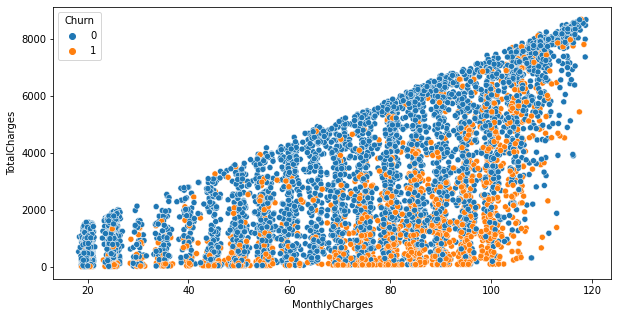

In [84]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=telco, hue='Churn')
ax;

### Multivariate Correlation Analysis

#### Question 5:

##### Conduct a Correlation analysis

##### Task 1: Replace some columns of No and Yes to 0 and 1 respectfully

In [85]:
# telco['Churn'] = np.where(telco['Churn'] == "No", 0, 1)

In [86]:
# telco['StreamingMovies'] = np.where(telco['StreamingMovies'] == "No", 0, 1)

In [87]:
# telco['StreamingTV'] = np.where(telco['StreamingTV'] == "No", 0, 1)

In [88]:
# telco['Contract'] = np.select((telco['Contract']== 'Month-to-month', telco['Contract']== 'One year', telco['Contract']== 'Two year'), (0,1,2))

##### Task 2: Correlation Analysis

In [89]:
cor = telco.corr(
    method = 'pearson',
    min_periods = 1
)

In [90]:
cor = telco.corr()
cor

,SeniorCitizen,tenure,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,-0.129721,-0.120658,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.138208,0.142143,0.246862,0.825880,-0.354049
StreamingTV,-0.129721,0.138208,1.000000,0.809507,-0.422060,-0.075697,-0.205246
StreamingMovies,-0.120658,0.142143,0.809507,1.000000,-0.423773,-0.072571,-0.207150
MonthlyCharges,0.219874,0.246862,-0.422060,-0.423773,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,-0.075697,-0.072571,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,-0.205246,-0.207150,0.192858,-0.199484,1.000000


In [91]:
corr = cor.unstack()
corr

SeniorCitizen    SeniorCitizen      1.000000
                 tenure             0.015683
                 StreamingTV       -0.129721
                 StreamingMovies   -0.120658
                 MonthlyCharges     0.219874
                 TotalCharges       0.102411
                 Churn              0.150541
tenure           SeniorCitizen      0.015683
                 tenure             1.000000
                 StreamingTV        0.138208
                 StreamingMovies    0.142143
                 MonthlyCharges     0.246862
                 TotalCharges       0.825880
                 Churn             -0.354049
StreamingTV      SeniorCitizen     -0.129721
                 tenure             0.138208
                 StreamingTV        1.000000
                 StreamingMovies    0.809507
                 MonthlyCharges    -0.422060
                 TotalCharges      -0.075697
                 Churn             -0.205246
StreamingMovies  SeniorCitizen     -0.120658
          

In [92]:
corr_pair = corr.sort_values()
corr_pair

StreamingMovies  MonthlyCharges    -0.423773
MonthlyCharges   StreamingMovies   -0.423773
                 StreamingTV       -0.422060
StreamingTV      MonthlyCharges    -0.422060
tenure           Churn             -0.354049
Churn            tenure            -0.354049
                 StreamingMovies   -0.207150
StreamingMovies  Churn             -0.207150
Churn            StreamingTV       -0.205246
StreamingTV      Churn             -0.205246
Churn            TotalCharges      -0.199484
TotalCharges     Churn             -0.199484
SeniorCitizen    StreamingTV       -0.129721
StreamingTV      SeniorCitizen     -0.129721
StreamingMovies  SeniorCitizen     -0.120658
SeniorCitizen    StreamingMovies   -0.120658
StreamingTV      TotalCharges      -0.075697
TotalCharges     StreamingTV       -0.075697
                 StreamingMovies   -0.072571
StreamingMovies  TotalCharges      -0.072571
SeniorCitizen    tenure             0.015683
tenure           SeniorCitizen      0.015683
TotalCharg

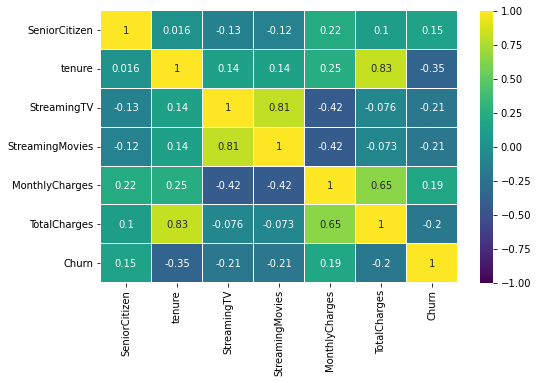

In [93]:
plt.figure(figsize=(8,5))
sns.heatmap(cor, annot=True, vmax=1, vmin=-1, center=0, cmap= "viridis",  linewidth =0.1)
plt.show()

In [94]:
#filter out the lower correlection below 15%
high_corr = corr_pair[(corr_pair) > 0.15]

print(high_corr)

Churn            SeniorCitizen      0.150541
SeniorCitizen    Churn              0.150541
MonthlyCharges   Churn              0.192858
Churn            MonthlyCharges     0.192858
SeniorCitizen    MonthlyCharges     0.219874
MonthlyCharges   SeniorCitizen      0.219874
                 tenure             0.246862
tenure           MonthlyCharges     0.246862
MonthlyCharges   TotalCharges       0.651065
TotalCharges     MonthlyCharges     0.651065
StreamingMovies  StreamingTV        0.809507
StreamingTV      StreamingMovies    0.809507
tenure           TotalCharges       0.825880
TotalCharges     tenure             0.825880
SeniorCitizen    SeniorCitizen      1.000000
StreamingMovies  StreamingMovies    1.000000
MonthlyCharges   MonthlyCharges     1.000000
StreamingTV      StreamingTV        1.000000
tenure           tenure             1.000000
TotalCharges     TotalCharges       1.000000
Churn            Churn              1.000000
dtype: float64


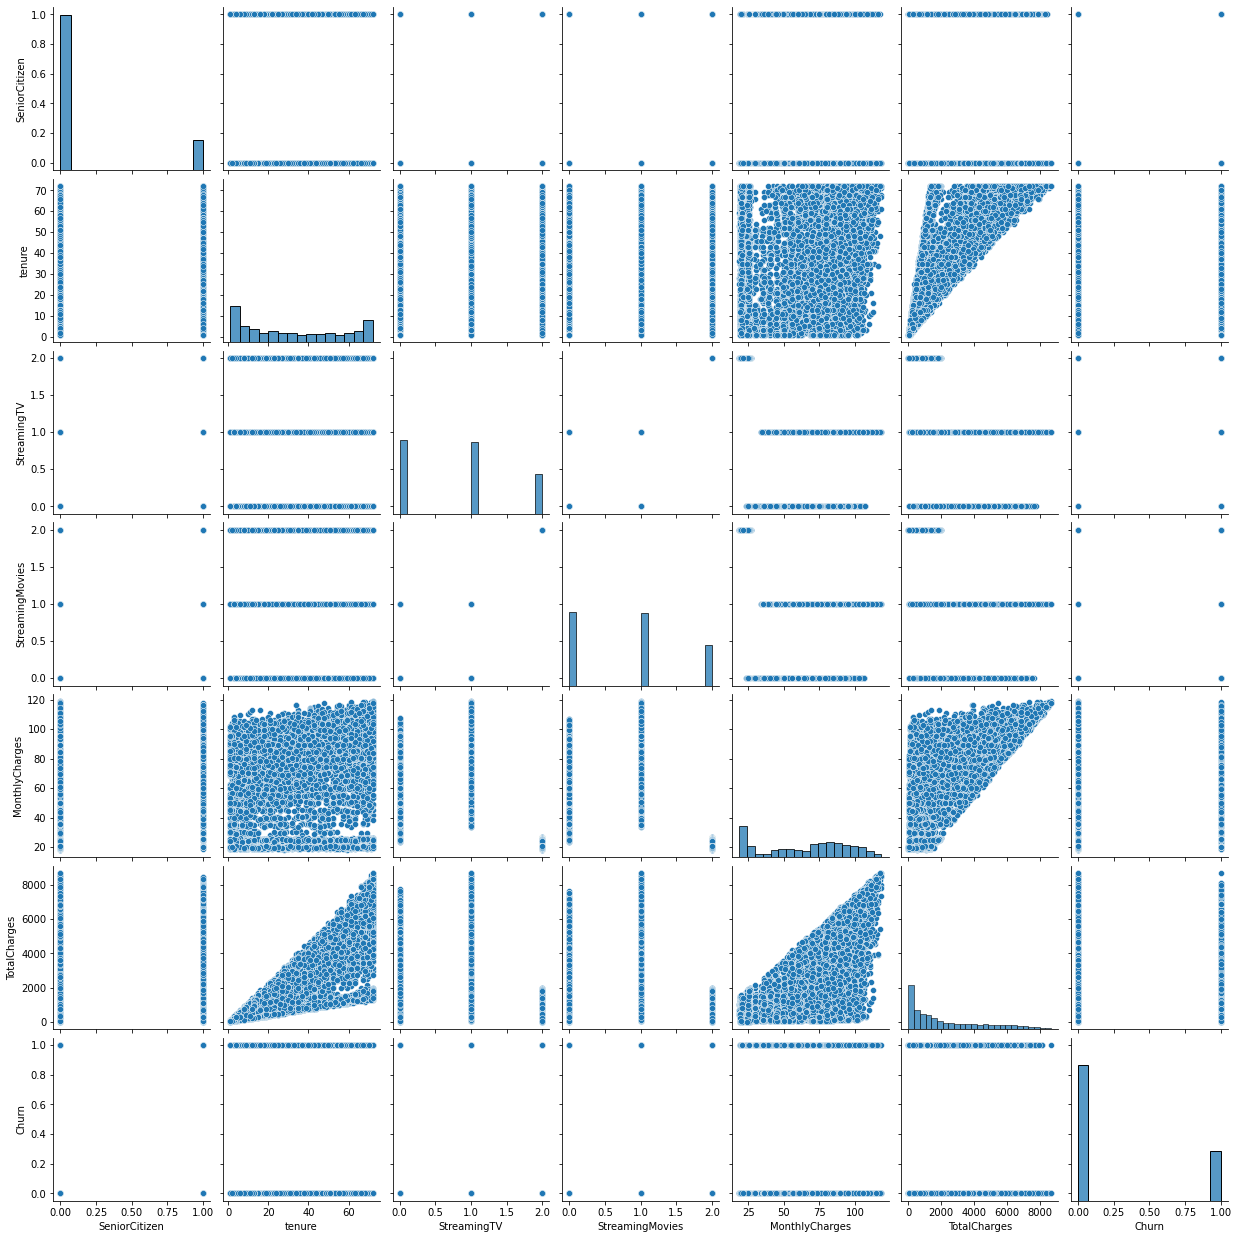

In [95]:
sns.pairplot(telco);

#### Question 6:

##### Multivariate Logistic Regression

In [96]:
#instantiate the model
model = LogisticRegression()

In [97]:
#display the columns name of the dataset
telco.columns.values.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [98]:
#define the predictor variables and the response variable
telco_cols = ['SeniorCitizen', 'tenure', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges']
X = telco[telco_cols]
y = telco.Churn

In [99]:
#split the dataset into training (70%) and testing (30%). 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [100]:
# model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
# preds = model1.predict(X_test)

In [101]:
#display x-testing
X_test

,SeniorCitizen,tenure,StreamingTV,StreamingMovies,MonthlyCharges
5561,0,1,2,2,20.65
5814,0,16,2,2,20.60
2645,0,1,2,2,19.80
3983,0,1,0,0,24.25
6438,1,1,0,0,74.40
...,...,...,...,...,...
4108,0,33,2,2,19.45
2687,0,28,0,1,91.00
5843,1,35,0,0,81.60
3576,0,72,2,2,23.30


In [102]:
#fit the model using the traing data
model.fit(X_train,y_train)

LogisticRegression()

##### Model Evaluation

In [103]:
#use model to make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
#Check the predict probabilities
model.predict_proba(X_test)

array([[0.79510981, 0.20489019],
       [0.89771988, 0.10228012],
       [0.7992042 , 0.2007958 ],
       ...,
       [0.59143418, 0.40856582],
       [0.99413609, 0.00586391],
       [0.9908002 , 0.0091998 ]])

In [105]:
#check the accuracy of the model 
model.score(X_test, y_test) 

0.7819905213270142

In [106]:
accuracy_score(y_test, y_pred) * 100

78.19905213270142

In [107]:
model.intercept_

array([-1.63354879])

In [108]:
#Check the coeffient
model.coef_

array([[ 0.73358852, -0.05430981, -0.08473014, -0.0569307 ,  0.02979052]])

In [109]:
#check the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1404,  151],
       [ 309,  246]], dtype=int64)

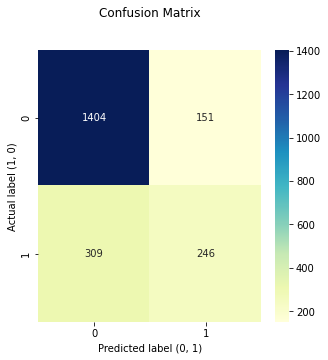

In [110]:
#Visualization of the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
# ax.imshow(cnf_matrix)
# ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title("Confusion Matrix", y=1.1)
plt.xlabel('Predicted label (0, 1)')
plt.ylabel('Actual label (1, 0)');

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1555
           1       0.62      0.44      0.52       555

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [112]:
precision,recall,fscore,support=score(y_test,y_pred, average='macro')
print ('Precision : {}'.format(precision))
print ('Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

Precision : 0.7196310330985014
Recall    : 0.6730685669592422
F-score   : 0.6880239243800336
Support   : None


In [113]:
#check the precision of the customer Churn
print("Precision:", metrics.precision_score(y_test, y_pred)*100)

#Check the accuracy of my prediction model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

#If customer is going to Churn in the test set
print("Recall:", metrics.recall_score(y_test, y_pred)*100)

Precision: 61.96473551637279
Accuracy: 78.19905213270142
Recall: 44.32432432432433


##### Plot the ROC Curve

In [114]:
# keep probabilities for the positive outcome only
# pred_probs = pred_probs[::, 1]
# pred_probs

y_proba = model.predict_proba(X_test)[::,1]

In [115]:
# calculate scores
lr_auc = roc_auc_score(y_test, y_proba)
lr_auc

0.8079916572521075

In [116]:
# summarize scores
print('ROC AUC= %.3f' % (lr_auc))

ROC AUC= 0.808


In [117]:
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba)

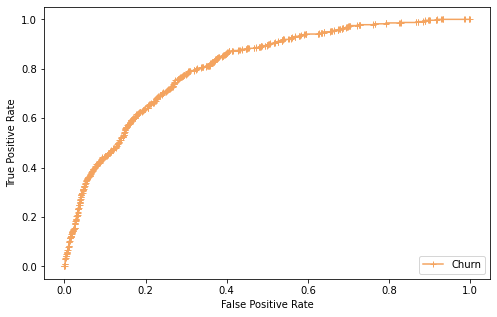

In [118]:
#plot the roc curve
plt.figure(figsize=(8,5))

plt.plot(lr_fpr, lr_tpr, marker="+", label='Churn', color="sandybrown")


#axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [119]:
# #change 1D array to 2D array
# X_test= X_test.values.reshape(-1, 1)
# y_test= y_test.values.reshape(-1, 1)

In [120]:
# #ROC Curve
# y_proba = model.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
# auc = metrics.roc_auc_score(y_test, y_proba)

# #Create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.ylabel("True Positive Rate")
# plt.xlabel("False Positive Rate")
# plt.legend(loc=4)
# plt.show();